In [15]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# dataset = pd.read_csv("./R03_25")   #load your dataset from drive here.
dataset = pd.read_csv("C:\\Users\\papir\\Downloads\\Telegram Desktop\\Task wise combined csv files - Task R04\\R04_25")


In [17]:
dataset.drop(columns={"Unnamed: 0"}, inplace=True)

In [18]:
dataset.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,...,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..,label
0,-5.0,2.0,37.0,39.0,30.0,26.0,-16.0,-14.0,4.0,18.0,...,-8.0,-35.0,-45.0,-66.0,-39.0,-33.0,-48.0,-39.0,-39.0,0
1,-12.0,-24.0,1.0,-2.0,-15.0,-22.0,-55.0,-36.0,-27.0,-25.0,...,-40.0,-68.0,-65.0,-84.0,-52.0,-21.0,-42.0,-31.0,-34.0,0
2,-77.0,-78.0,-59.0,-65.0,-63.0,-55.0,-67.0,-88.0,-71.0,-65.0,...,-22.0,-50.0,-35.0,-48.0,-18.0,-20.0,-42.0,-29.0,-27.0,0
3,-66.0,-67.0,-50.0,-65.0,-60.0,-55.0,-68.0,-62.0,-53.0,-54.0,...,-60.0,-78.0,-64.0,-68.0,-41.0,-44.0,-62.0,-34.0,-43.0,0
4,-45.0,-55.0,-33.0,-53.0,-54.0,-63.0,-83.0,-52.0,-50.0,-53.0,...,-55.0,-70.0,-54.0,-63.0,-37.0,-60.0,-70.0,-34.0,-45.0,0


In [19]:
# data = dataset          # 64 electrodes 
# data = dataset.iloc[: ,:32]   #for 32 electrodes
#data = dataset.iloc[: ,:16]      #for 16 electrodes
data = dataset.iloc[: ,:8]     #for 8 electrodes
data['label'] = dataset['label']    #uncomment this line if you not use 64 electrodes

# uncomment the above lines for corresponding combination


In [20]:
data.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,label
0,-5.0,2.0,37.0,39.0,30.0,26.0,-16.0,-14.0,0
1,-12.0,-24.0,1.0,-2.0,-15.0,-22.0,-55.0,-36.0,0
2,-77.0,-78.0,-59.0,-65.0,-63.0,-55.0,-67.0,-88.0,0
3,-66.0,-67.0,-50.0,-65.0,-60.0,-55.0,-68.0,-62.0,0
4,-45.0,-55.0,-33.0,-53.0,-54.0,-63.0,-83.0,-52.0,0


In [21]:
data.shape

(493200, 9)

In [22]:
from sklearn.model_selection import train_test_split
X = data.drop(columns={"label"})
Y = data['label']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
scaler = StandardScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reshaped = X_train_scaled.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_reshaped = X_test_scaled.reshape(X_test.shape[0],X_test.shape[1],1)

num_samples = X_train.shape[0]
num_features = X_train.shape[1]


In [29]:
train_accuracies = []
val_accuracies = []

In [30]:
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(128, kernel_size=1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(128, kernel_size=1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))  
model.add(Dense(3, activation='softmax'))


In [31]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [34]:
epochs = 100
for epoch in range(epochs):
    print(f"epoch {epoch+1}/100")
    history = model.fit(X_train_reshaped, Y_train, validation_split=0.1,epochs=1, callbacks=[early_stopping])  
    train_accuracies.append(history.history['accuracy'][0])
    val_accuracies.append(history.history['val_accuracy'][0])


epoch 1/100
11097/11097 [==============================] - 104s 9ms/step - loss: 1.0228 - accuracy: 0.5063 - val_loss: 1.0109 - val_accuracy: 0.5121
epoch 2/100
 2676/11097 [======>.......................] - ETA: 1:16 - loss: 1.0143 - accuracy: 0.5124

KeyboardInterrupt: 

In [41]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped, Y_test, verbose=0)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.6335
Test Accuracy: 0.7873


In [42]:
print(train_accuracies)
print(len(train_accuracies))

[0.57166916, 0.6777085, 0.71252084, 0.7304649, 0.74382997, 0.75416213, 0.7635876, 0.771022, 0.7789352, 0.7861894, 0.7910359, 0.79711014, 0.80169755, 0.8060399, 0.810571, 0.81456417, 0.8187151, 0.82240134, 0.82603407, 0.8303342, 0.83221817, 0.8354595, 0.8380587, 0.8413676, 0.84360075, 0.84710115, 0.84888655, 0.8513703, 0.85342604, 0.8556254, 0.85809225, 0.8604099, 0.8618292, 0.8633161, 0.86542255, 0.8669291, 0.8682386, 0.8697086, 0.8715672, 0.87247396, 0.87451565, 0.87590116, 0.87630385, 0.8780414, 0.8790073, 0.8803618, 0.8820796, 0.88278925, 0.8841804, 0.8846873, 0.8863037, 0.88646424, 0.8878357, 0.88900995, 0.8897872, 0.89108545, 0.8912938, 0.8921302, 0.89303416, 0.8935861, 0.8940141, 0.89499414, 0.89611495, 0.89630646, 0.8983171, 0.89786935, 0.8985734, 0.89951956, 0.9003954, 0.90091074, 0.9011923, 0.9013275, 0.9025891, 0.9027074, 0.903448, 0.90415484, 0.90442234, 0.9057121, 0.90600216, 0.9059881, 0.9063739, 0.9073342, 0.9083677, 0.90822405, 0.9083311, 0.9094012, 0.9091731, 0.9098264,

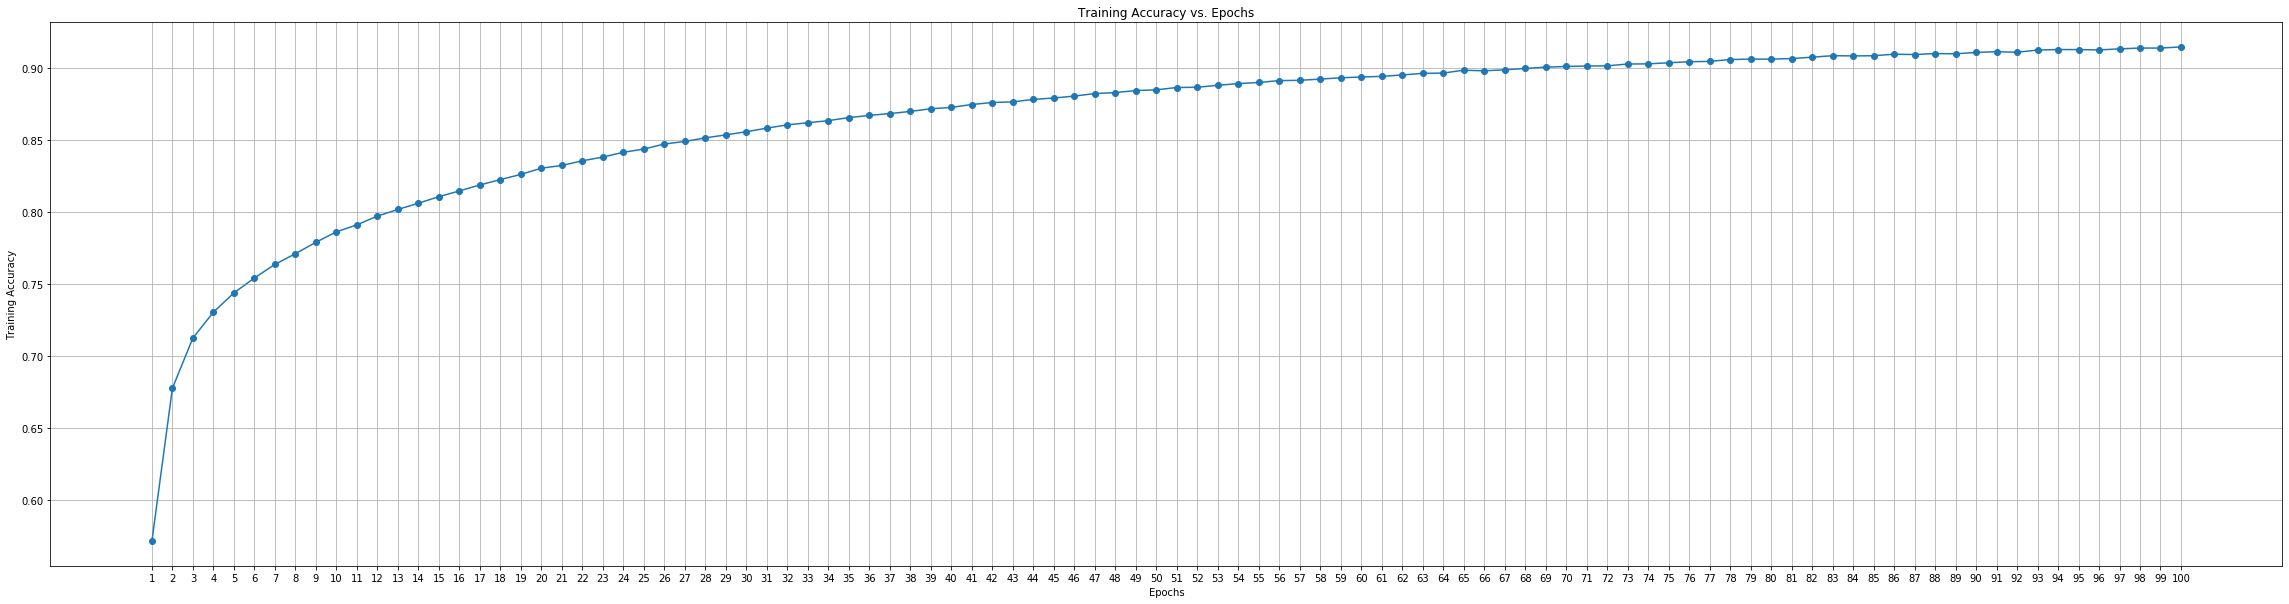

In [4]:
import matplotlib.pyplot as plt
epochs_list = [i for i in range(1,101)]
plt.figure(figsize=(40,10))
plt.plot(epochs_list, train_accuracies, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs. Epochs')
plt.grid(True)
plt.xticks(range(1, 101))

plt.show()

In [1]:
train_accuracies = [0.57166916, 0.6777085, 0.71252084, 0.7304649, 0.74382997, 0.75416213, 0.7635876, 0.771022, 0.7789352, 0.7861894, 0.7910359, 0.79711014, 0.80169755, 0.8060399, 0.810571, 0.81456417, 0.8187151, 0.82240134, 0.82603407, 0.8303342, 0.83221817, 0.8354595, 0.8380587, 0.8413676, 0.84360075, 0.84710115, 0.84888655, 0.8513703, 0.85342604, 0.8556254, 0.85809225, 0.8604099, 0.8618292, 0.8633161, 0.86542255, 0.8669291, 0.8682386, 0.8697086, 0.8715672, 0.87247396, 0.87451565, 0.87590116, 0.87630385, 0.8780414, 0.8790073, 0.8803618, 0.8820796, 0.88278925, 0.8841804, 0.8846873, 0.8863037, 0.88646424, 0.8878357, 0.88900995, 0.8897872, 0.89108545, 0.8912938, 0.8921302, 0.89303416, 0.8935861, 0.8940141, 0.89499414, 0.89611495, 0.89630646, 0.8983171, 0.89786935, 0.8985734, 0.89951956, 0.9003954, 0.90091074, 0.9011923, 0.9013275, 0.9025891, 0.9027074, 0.903448, 0.90415484, 0.90442234, 0.9057121, 0.90600216, 0.9059881, 0.9063739, 0.9073342, 0.9083677, 0.90822405, 0.9083311, 0.9094012, 0.9091731, 0.9098264, 0.9096913, 0.9106177, 0.9111528, 0.9107444, 0.912268, 0.9126369, 0.9126031, 0.9123609, 0.9131015, 0.91367596, 0.9136535, 0.9144645]
print(sum(train_accuracies))

86.44065414999997


In [2]:
print(max(train_accuracies))

0.9144645


In [ ]:
y_test_data = np.array(Y_test)

y_test_data.shape

In [ ]:
from sklearn.metrics import accuracy_score

input_data = np.array(X_test_reshaped[2390]).reshape(1,X_test_reshaped[0].shape[0], X_test_reshaped[0].shape[1])

print(input_data.shape)
pred = model.predict(input_data)
y_pred_labels = np.argmax(pred, axis=1)

print("True Label:", Y_test.iloc[0])  
print("Predicted Label:", y_pred_labels[0])
print("Predicted Probabilities:", pred)



## 